In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [8]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [9]:
cars_df = pd.read_csv('/content/drive/MyDrive/COSC3337/hw1/car_data.csv')
print(cars_df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [10]:
summary_statistics = cars_df.describe()
print(summary_statistics)

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#Since the non-null count matches the number of entries in the dataset in every column,
#it can be said that there are no missing values.

In [11]:
cars_df['car_company'] = cars_df['CarName'].apply(lambda x: x.split(' ')[0].lower())

print(cars_df['car_company'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [12]:
typo_correction = {
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda': 'mazda',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}
cars_df['car_company'] = cars_df['car_company'].replace(typo_correction)
print(cars_df['car_company'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


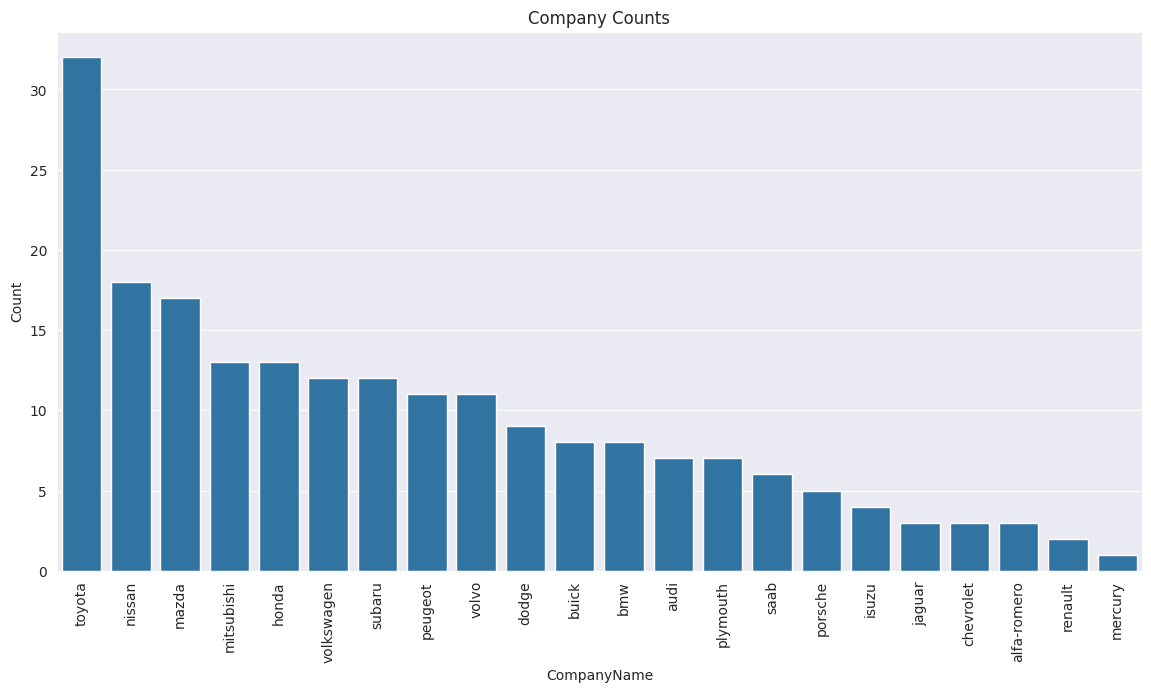

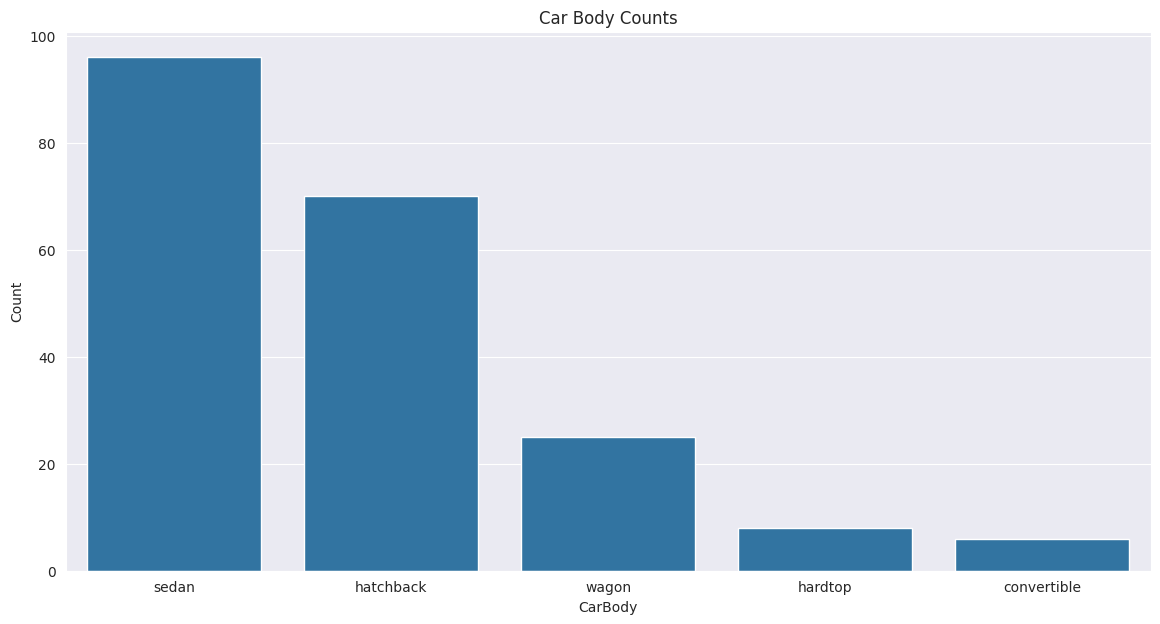

In [13]:
#unique company names and their counts
plt.figure(figsize=(14, 7))
company_count_plot = sns.countplot(x='car_company', data=cars_df, order = cars_df['car_company'].value_counts().index)
company_count_plot.set_title('Company Counts')
company_count_plot.set_xlabel('CompanyName')
company_count_plot.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#unique car body types and their counts
plt.figure(figsize=(14, 7))
car_body_count_plot = sns.countplot(x='carbody', data=cars_df, order = cars_df['carbody'].value_counts().index)
car_body_count_plot.set_title('Car Body Counts')
car_body_count_plot.set_xlabel('CarBody')
car_body_count_plot.set_ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Conclusion from the plots

#The graph reveals a huge difference of the thickness of data among different companies and different car types. The dataset contains more data for those that are aimed at mass consumers, as such brands: Toyota, Nissan, and Mazda, and as such car body: sedan.

<ipython-input-14-6efb56add2b3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='car_company', y='price', data=cars_df, estimator=np.mean, ci='sd', order=cars_df.groupby('car_company')['price'].mean().sort_values(ascending=False).index)


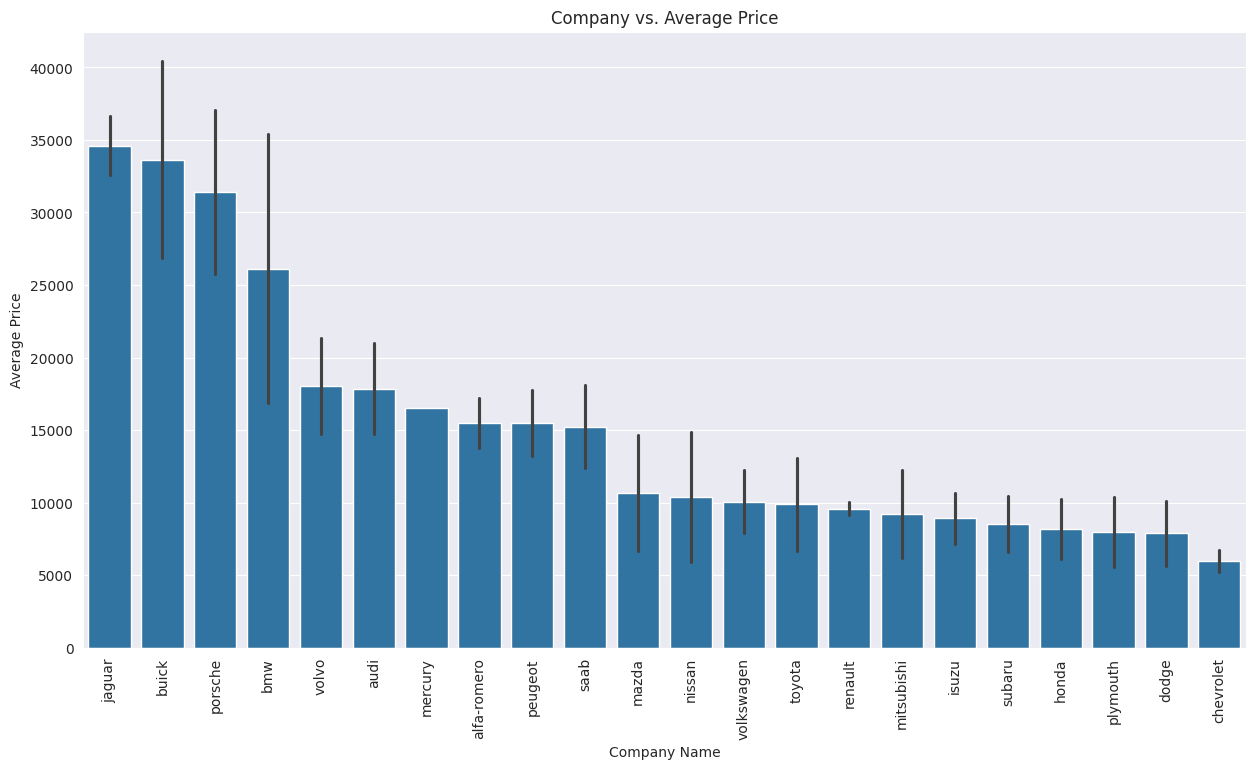

<ipython-input-14-6efb56add2b3>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='carbody', y='price', data=cars_df, estimator=np.mean, ci='sd', order=cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False).index)


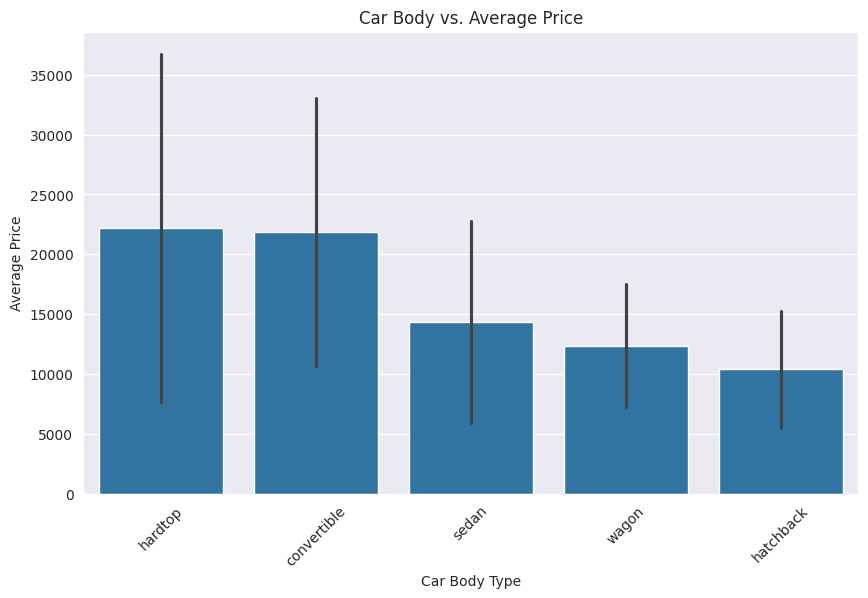

In [14]:
plt.figure(figsize=(15, 8))
sns.barplot(x='car_company', y='price', data=cars_df, estimator=np.mean, ci='sd', order=cars_df.groupby('car_company')['price'].mean().sort_values(ascending=False).index)
plt.title('Company vs. Average Price')
plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='carbody', y='price', data=cars_df, estimator=np.mean, ci='sd', order=cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False).index)
plt.title('Car Body vs. Average Price')
plt.xlabel('Car Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#The plot shows that the car brands and types that were less present in the data, which indicates that they are not as popular in mass consumers, were higher in the price. Jaguar and porche, whcih were one of the bottom in the company counts, are in the top 3 in the price. Hardtop and convertible, which were the lowest two in counts, are the top two in the price. The inly exception is Buick, which was fairly present in counts, but is placed in the top two in the price.

<ipython-input-19-eec54f39af39>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x='symboling', data=cars_df, palette='colorblind')


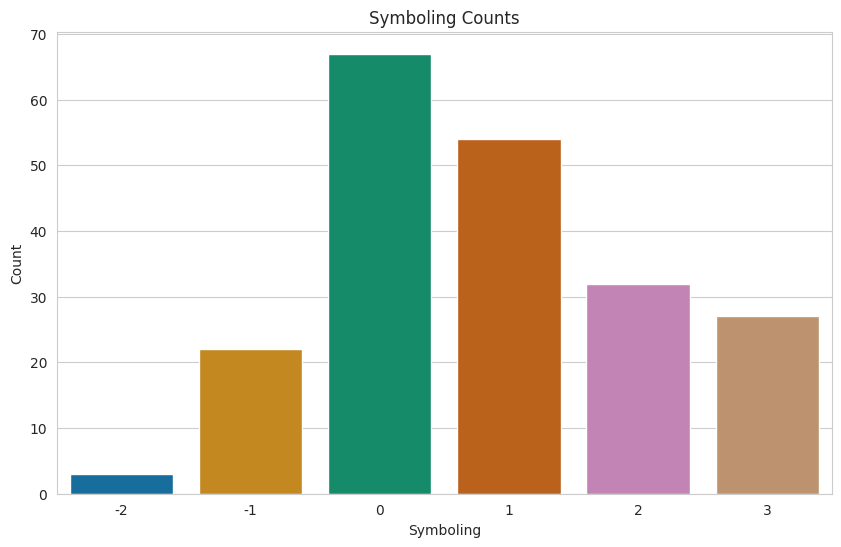

<ipython-input-19-eec54f39af39>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='symboling', y='price', data=cars_df, palette='colorblind')


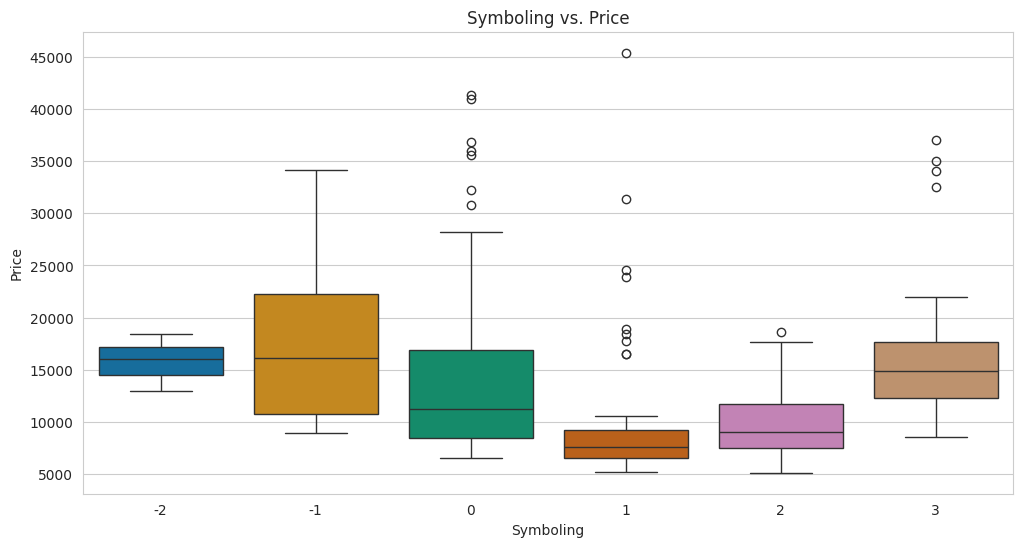

In [19]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='symboling', data=cars_df, palette='colorblind')
count_plot.set_title('Symboling Counts')
count_plot.set_xlabel('Symboling')
count_plot.set_ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(x='symboling', y='price', data=cars_df, palette='colorblind')
box_plot.set_title('Symboling vs. Price')
box_plot.set_xlabel('Symboling')
box_plot.set_ylabel('Price')
plt.show()

In [ ]:
#The resulting plots provide insights into the distribution and impact of the insurance risk rating (symboling) on the car prices within the dataset. The count plot reveals that the most common insurance risk ratings are 0 and 1, indicating a moderate risk according to the insurance risk assessment. There are fewer cars with the ratings -1, 2, and 3, with -2 being the least common, suggesting these ratings are less frequently assigned to vehicles in the dataset.

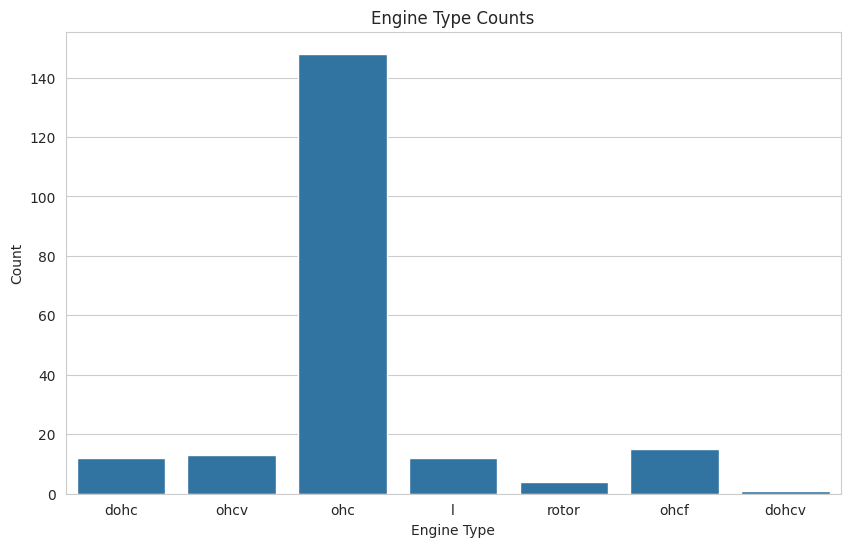

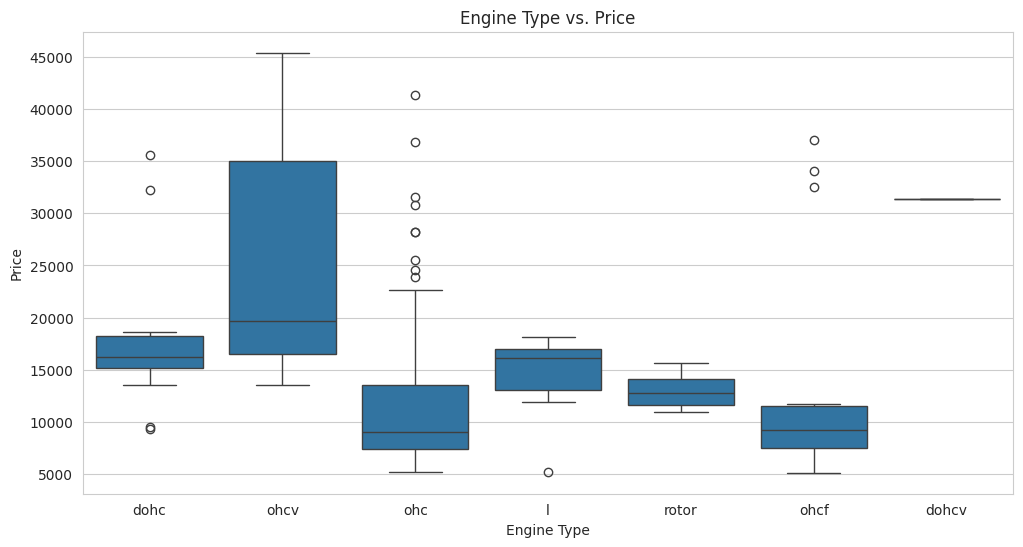

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='enginetype', data=cars_df)
count_plot.set_title('Engine Type Counts')
count_plot.set_xlabel('Engine Type')
count_plot.set_ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(x='enginetype', y='price', data=cars_df)
box_plot.set_title('Engine Type vs. Price')
box_plot.set_xlabel('Engine Type')
box_plot.set_ylabel('Price')
plt.show()

In [ ]:
#The count plot for engine types indicates that the 'ohc' (Overhead Camshaft) engine type is the most prevalent in the dataset, significantly outnumbering other engine types, which suggests it is a popular choice among manufacturers. The box plot for engine type versus price reveals that while the 'ohc' engine type has a wide range of prices, the 'ohcv' (Overhead Valve Camshaft) and 'rotor' engine types tend to be associated with higher-priced vehicles. This could reflect their use in higher performance or luxury vehicles, which are typically more expensive.

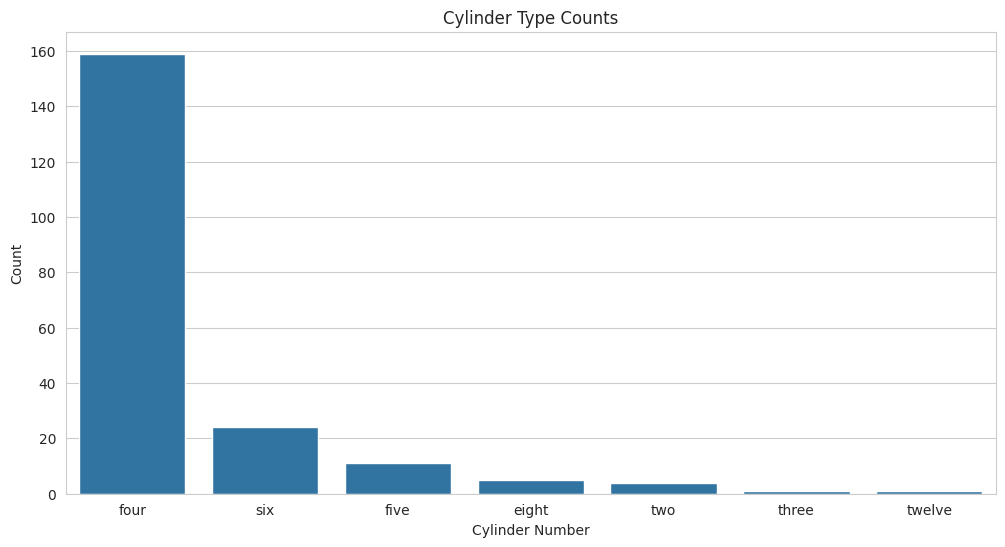

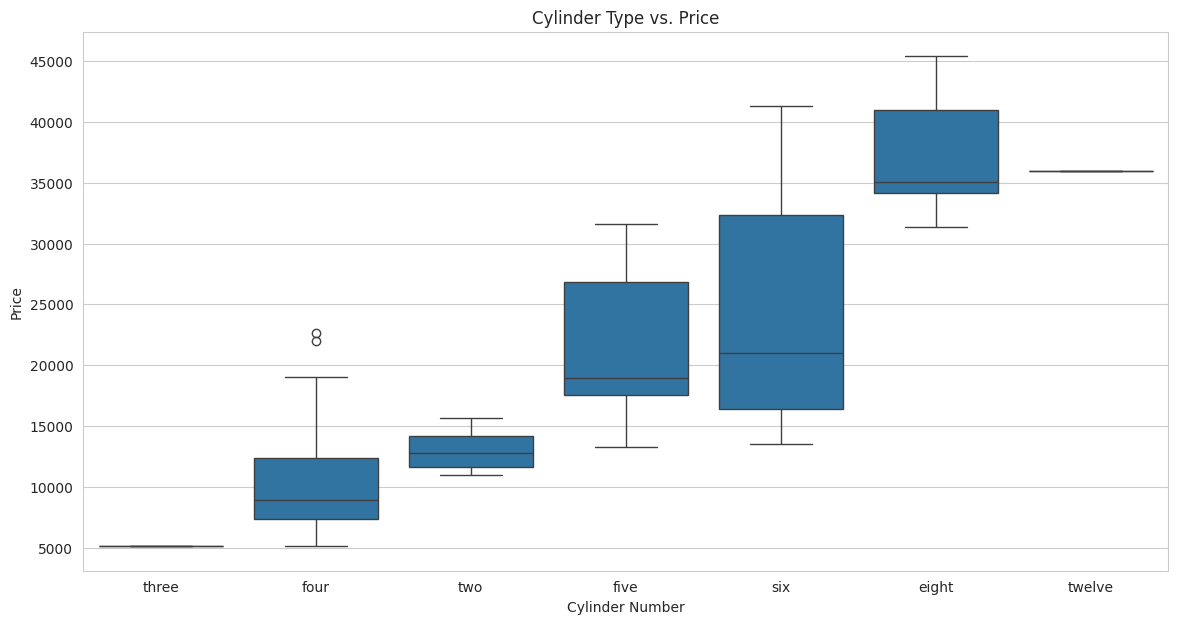

In [25]:
sns.set_style("whitegrid")

cylinder_count_order = cars_df['cylindernumber'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(x='cylindernumber', data=cars_df, order=cylinder_count_order)
plt.title('Cylinder Type Counts')
plt.xlabel('Cylinder Number')
plt.ylabel('Count')
plt.show()

cylinder_price_order = cars_df.groupby('cylindernumber')['price'].median().sort_values().index

plt.figure(figsize=(14, 7))
sns.boxplot(x='cylindernumber', y='price', data=cars_df, order=cylinder_price_order)
plt.title('Cylinder Type vs. Price')
plt.xlabel('Cylinder Number')
plt.ylabel('Price')
plt.show()

In [ ]:
#The count plot indicates that four-cylinder engines are by far the most common in the dataset, suggesting that they are a popular choice for their balance of power and efficiency. The box plot shows that as the number of cylinders increases, there is a general trend towards higher median prices, with eight-cylinder engines associated with the highest median prices, indicating that they are likely used in more powerful and luxurious vehicles. However, the presence of outliers, particularly for cars with two and three cylinders, suggests that there can be significant price variability within those categories.

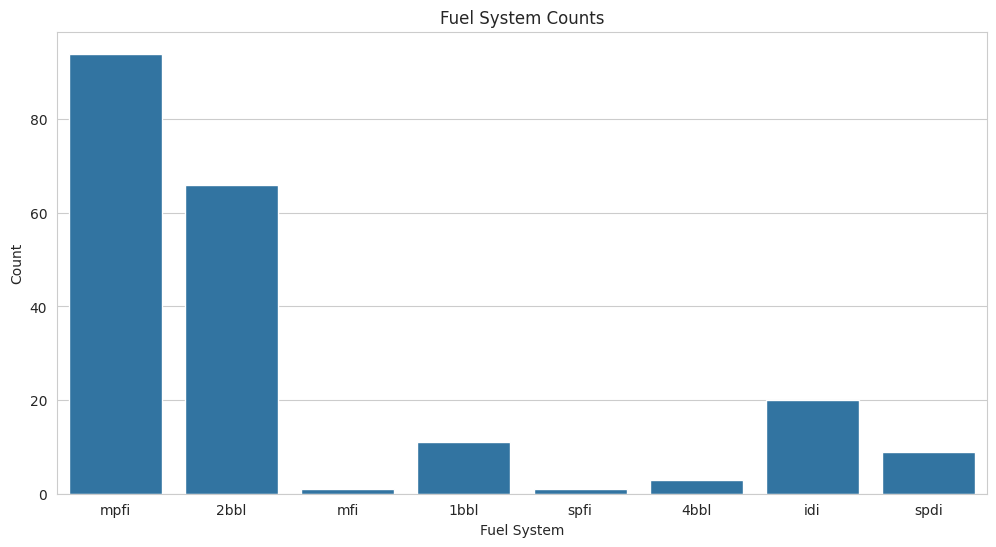

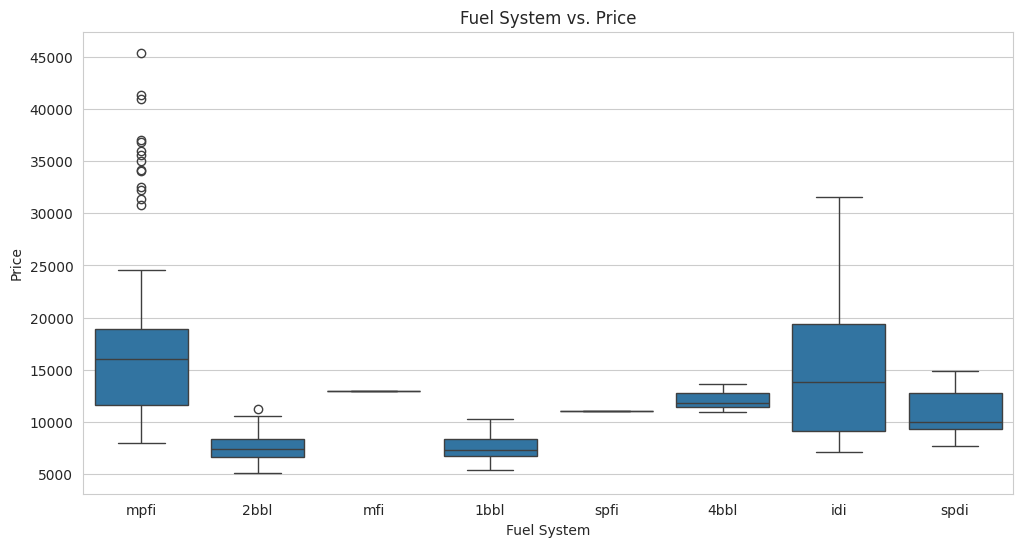

In [27]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='fuelsystem', data=cars_df)
plt.title('Fuel System Counts')
plt.xlabel('Fuel System')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='fuelsystem', y='price', data=cars_df)
plt.title('Fuel System vs. Price')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.show()

In [ ]:
#The count plot reveals that 'mpfi' (Multi-Point Fuel Injection) and '2bbl' (Two-Barrel Carburetor) are the most common fuel systems, reflecting their widespread adoption in the automotive market. The box plot for fuel system versus price shows that 'mpfi' systems are associated with a wide range of car prices, indicating their use across various car segments, while 'idi' (Indirect Diesel Injection) systems tend to be linked with higher-priced vehicles, which could suggest a preference for diesel in more premium or fuel-efficient models. The price variability within each fuel system category, indicated by the range of the box plots, points to a diverse market where fuel system types are utilized across both economical and luxury vehicles.

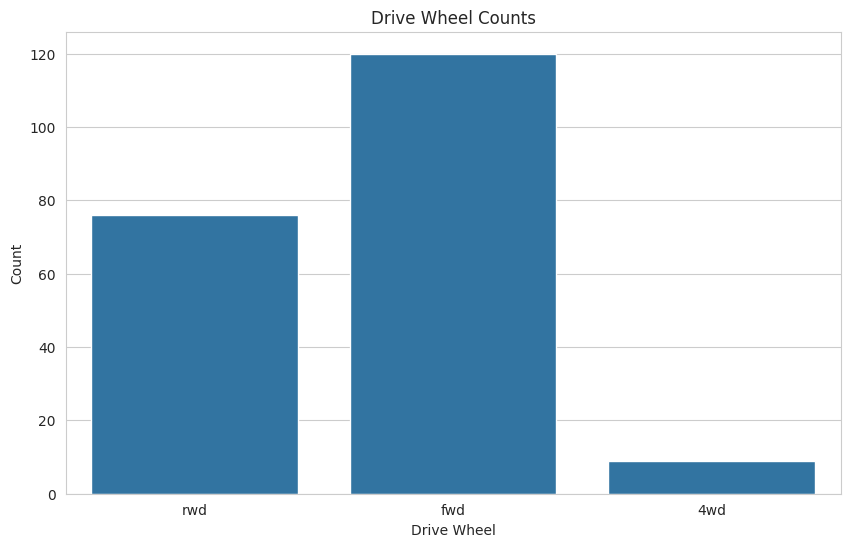

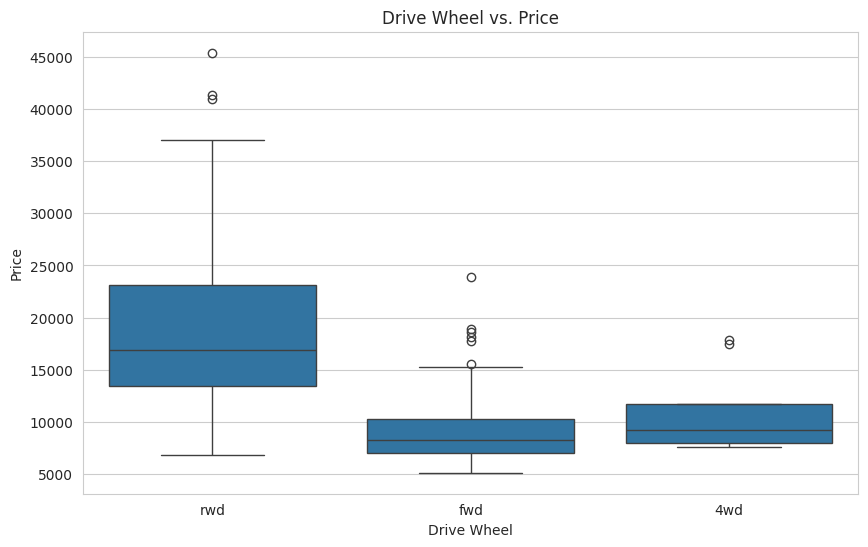

In [29]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='drivewheel', data=cars_df)
plt.title('Drive Wheel Counts')
plt.xlabel('Drive Wheel')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='drivewheel', y='price', data=cars_df)
plt.title('Drive Wheel vs. Price')
plt.xlabel('Drive Wheel')
plt.ylabel('Price')
plt.show()

In [ ]:
#front-wheel drive (fwd) vehicles, followed by rear-wheel vehicle. 4wd had a significantly lower count, which represents how unpopular they are.The box plot shows that rwd vehicles have a higher median price and a broader price range compared to fwd and 4wd, indicating their prevalence in more expensive vehicle segments.

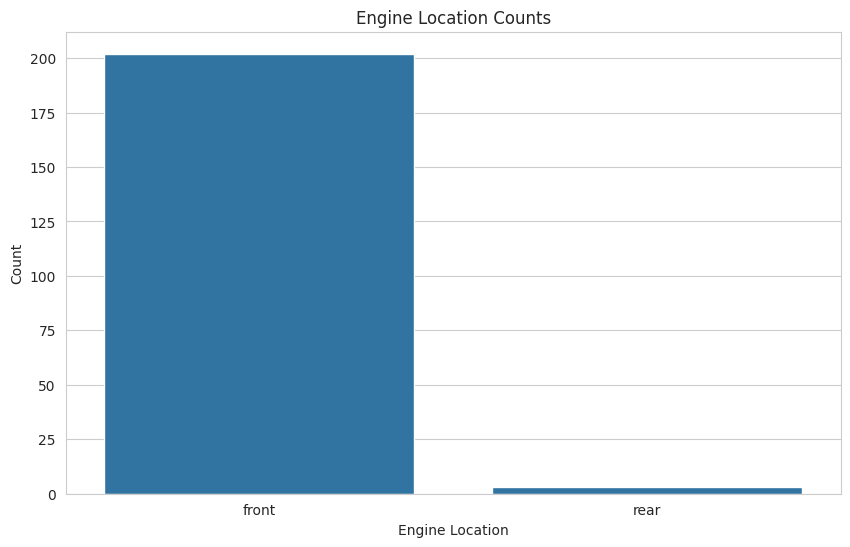

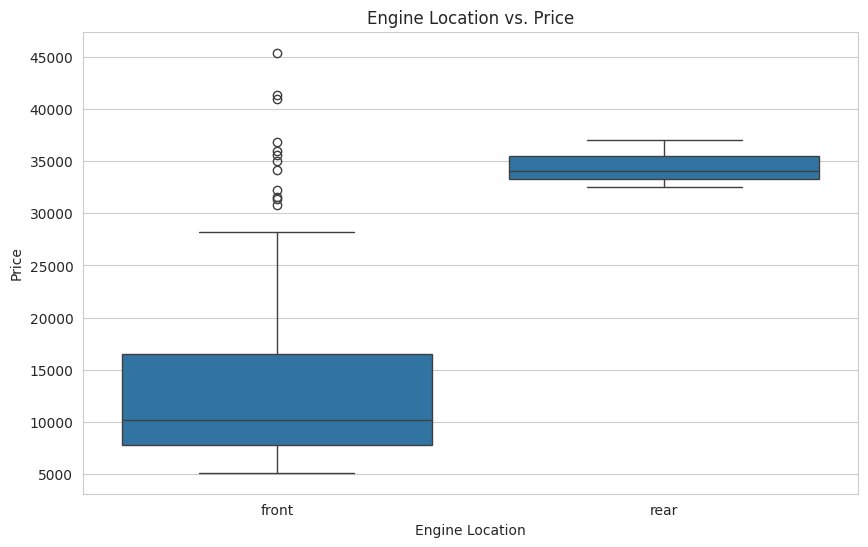

In [30]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='enginelocation', data=cars_df, order=cars_df['enginelocation'].value_counts().index)
plt.title('Engine Location Counts')
plt.xlabel('Engine Location')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='enginelocation', y='price', data=cars_df, order=["front", "rear"])
plt.title('Engine Location vs. Price')
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.show()

In [ ]:
#The plot shows the majority of vehicles have their engines in the front. The box plot suggests that vehicles with rear engine locations are generally more expensive, as reflected by a higher median price and a smaller interquartile range

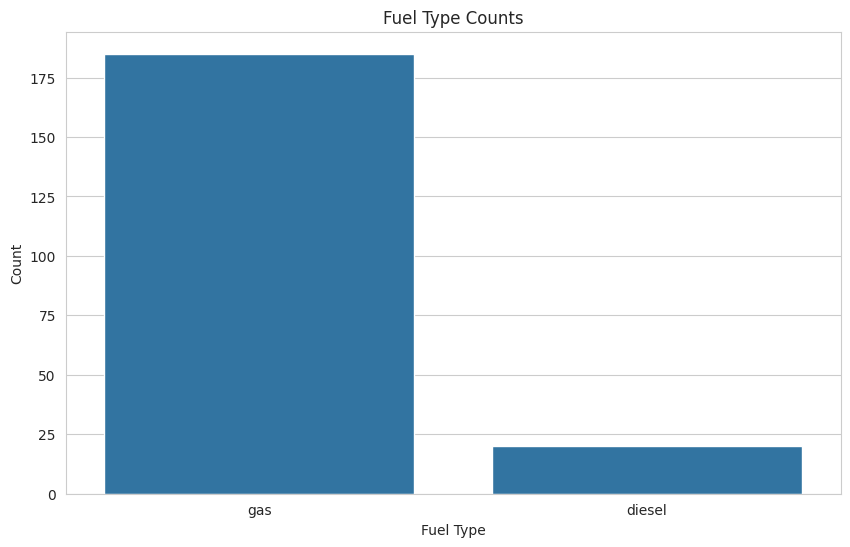

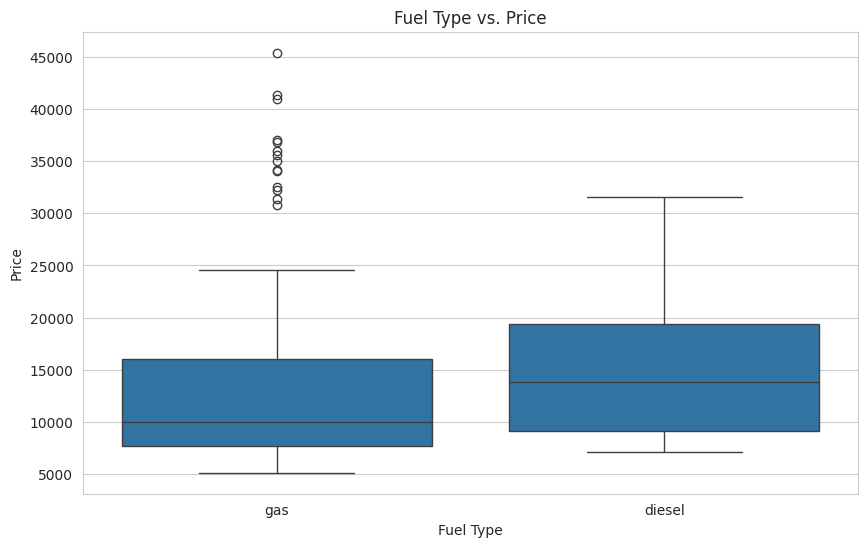

In [31]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='fueltype', data=cars_df, order=cars_df['fueltype'].value_counts().index)
plt.title('Fuel Type Counts')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='fueltype', y='price', data=cars_df)
plt.title('Fuel Type vs. Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

In [ ]:
#The plot shows that gas is far more popular than diesel. On the other hand, the box plot reveals that diesel vehicles tend to be more expensive. This indicates the possiblity that disel engine is unpopular due to their price.

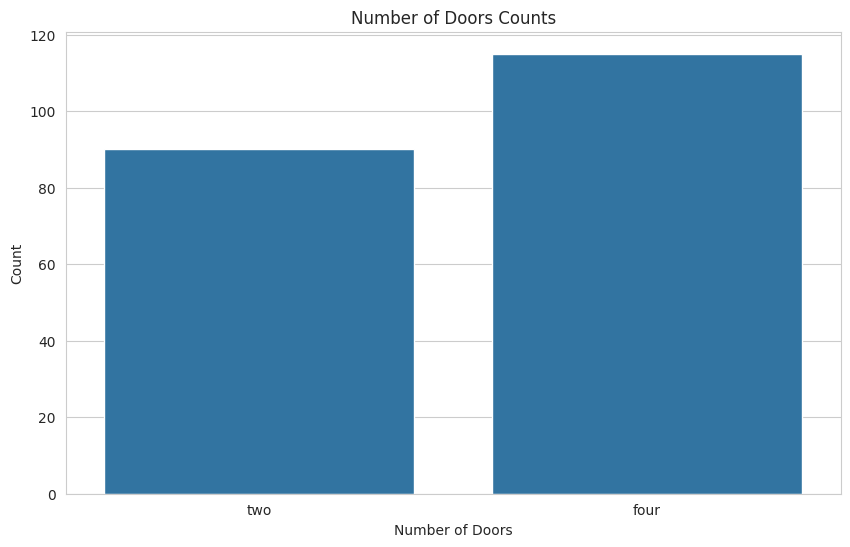

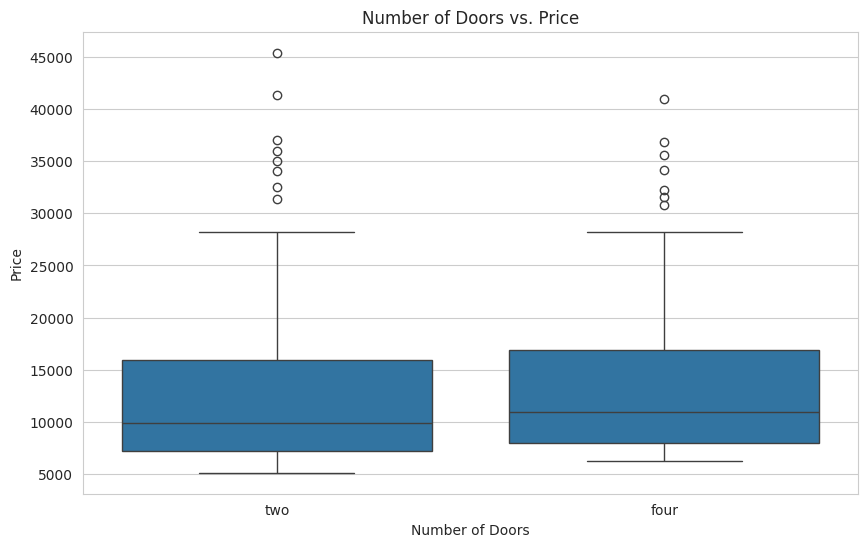

In [32]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='doornumber', data=cars_df, order=["two", "four"])
plt.title('Number of Doors Counts')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='doornumber', y='price', data=cars_df, order=["two", "four"])
plt.title('Number of Doors vs. Price')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.show()

In [ ]:
#The plot indicates that four-door vehicles are more prevalent in the dataset than two-door vehicles. On the other hand, the box plot didn't show a significant price difference between them unlike other genre. On thing to note tho, is that the most expensive cars were present in the two door cars.

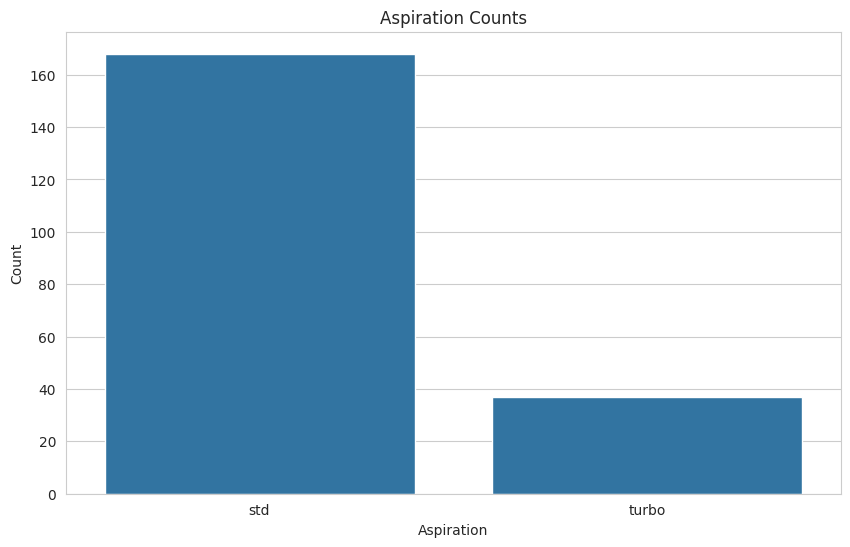

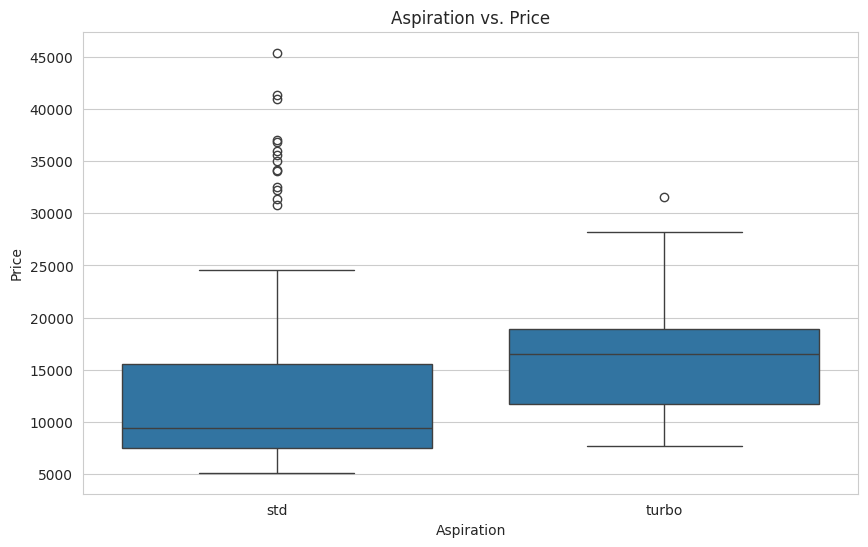

In [33]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='aspiration', data=cars_df)
plt.title('Aspiration Counts')
plt.xlabel('Aspiration')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='aspiration', y='price', data=cars_df)
plt.title('Aspiration vs. Price')
plt.xlabel('Aspiration')
plt.ylabel('Price')
plt.show()

In [ ]:
# The count plot shows that standard engines are far more popular than tuebo engine. This would usually be associated with the result the box plot of the price, as standard engine being far cheaper than turbo engine, which can acrtually be seen as the difference in median. However, standard engine had a number of outliers which were way more expensive than turbo engine, which shows the variety of cars using standard engine.

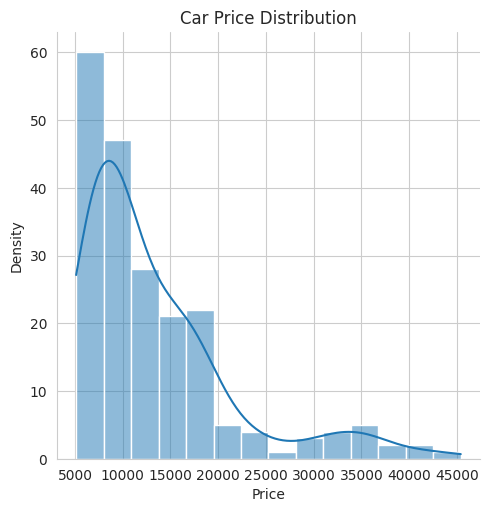

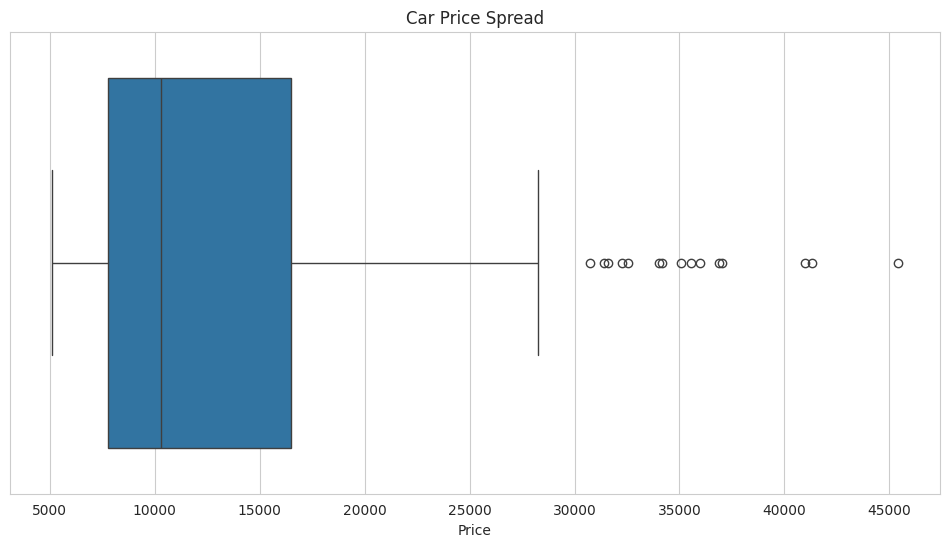

In [13]:
sns.set_style("whitegrid")


sns.displot(cars_df['price'], kde = True)
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
#plt.xlim(0, None)
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x=cars_df['price'])
plt.title('Car Price Spread')
plt.xlabel('Price')
plt.show()

In [ ]:
#The histogram with the KDE curve indicates that the distribution of car prices is right-skewed, with most cars concentrated in the lower price range and fewer cars at the higher price range, suggesting that more affordable cars are more common than luxury cars in this dataset. It is also worth noting, that the number of cars slightly goes up above 30000 price range, indicating the upper-middle price being the least popular. The box plot supports this, showing that the median car price is below the average. However, it can also be seen in the box plot that the range is wide with a number of outliers.

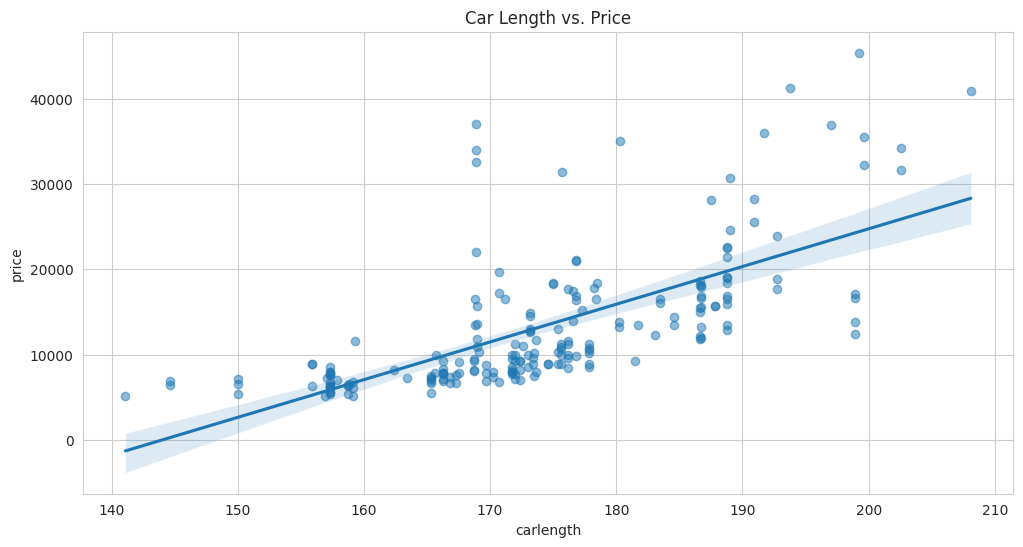

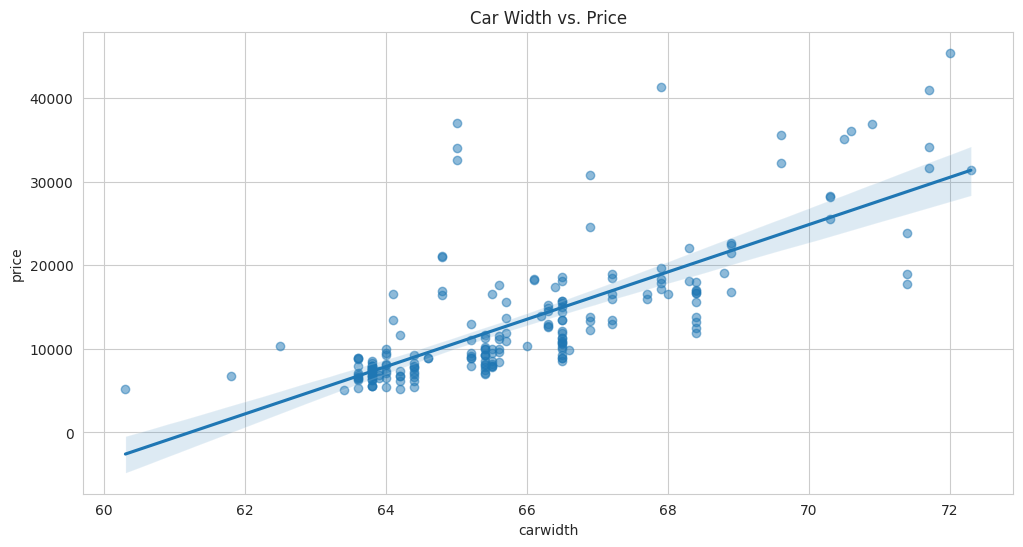

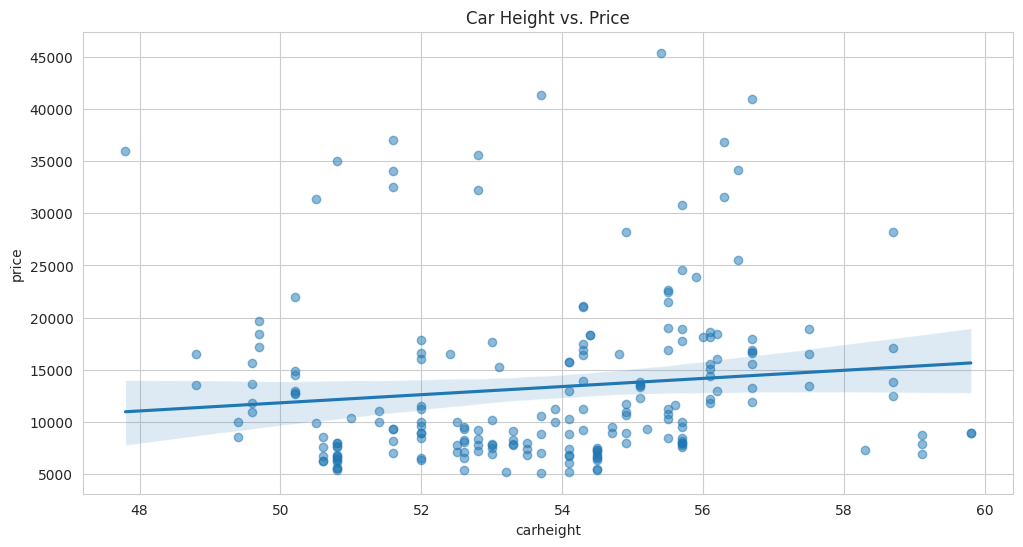

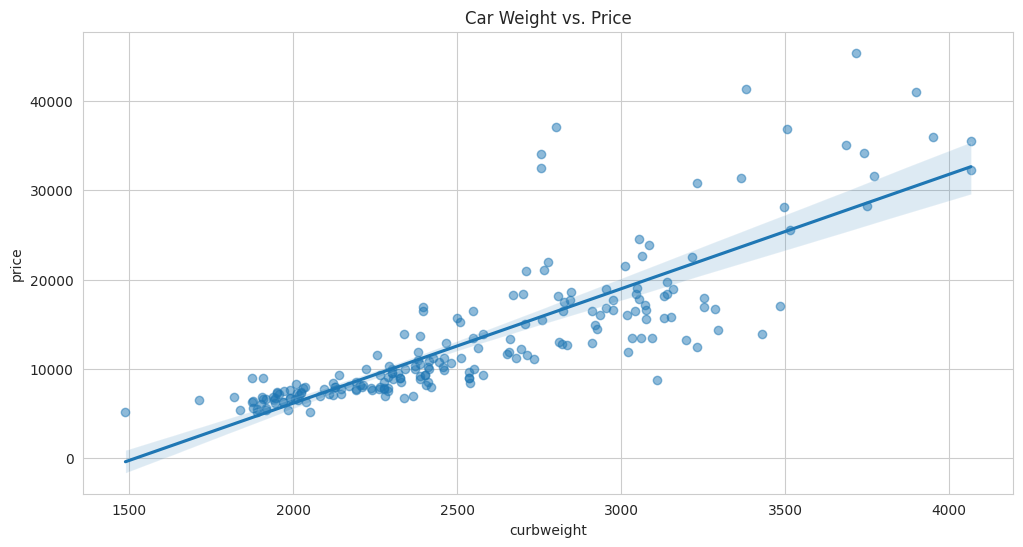

In [16]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
#sns.scatterplot(x='carlength', y='price', data=cars_df)
sns.regplot(x='carlength', y='price', data=cars_df, scatter_kws={'alpha':0.5})
plt.title('Car Length vs. Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='carwidth', y='price', data=cars_df, scatter_kws={'alpha':0.5})
plt.title('Car Width vs. Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='carheight', y='price', data=cars_df, scatter_kws={'alpha':0.5})
plt.title('Car Height vs. Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='curbweight', y='price', data=cars_df, scatter_kws={'alpha':0.5})
plt.title('Car Weight vs. Price')
plt.show()

In [ ]:
#The scatter plots with linear regression lines indicate positive relationships between the car's length, width, and weight with its price, suggesting that larger and heavier cars tend to be more expensive. The car height does not show as strong a relationship with the price as the other dimensions, indicating that height may be a less significant factor in car pricing. The tightness of the data around the regression line for car width and weight especially suggests a stronger correlation with price compared to car length and height, which have more scatter and variability.

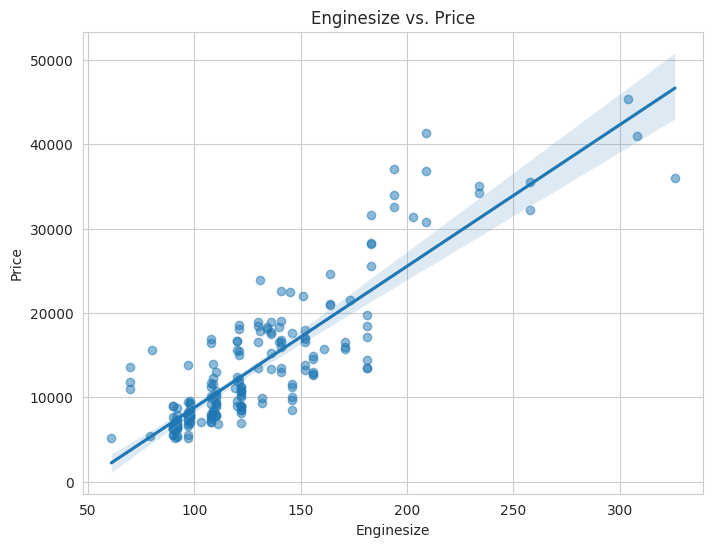

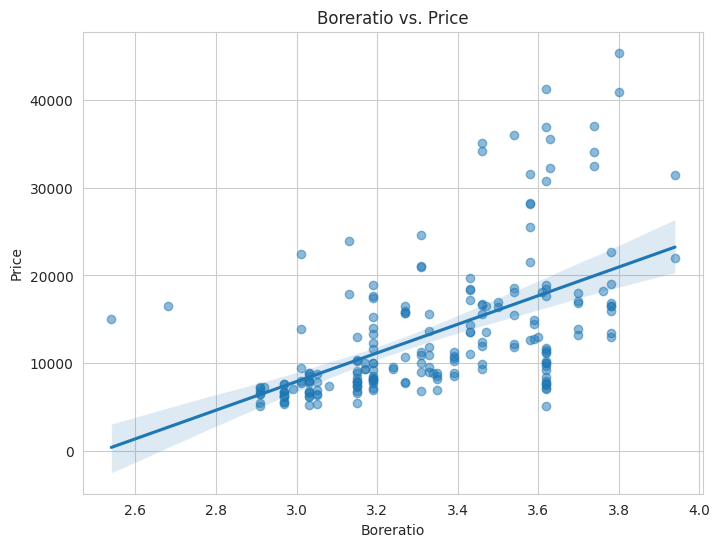

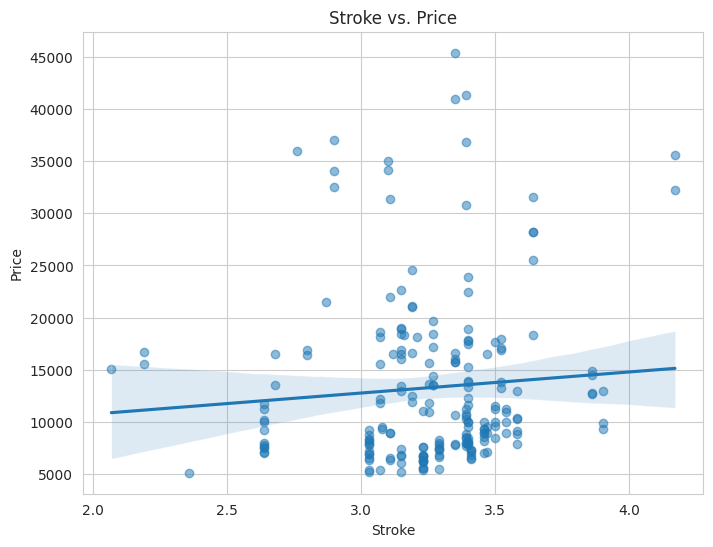

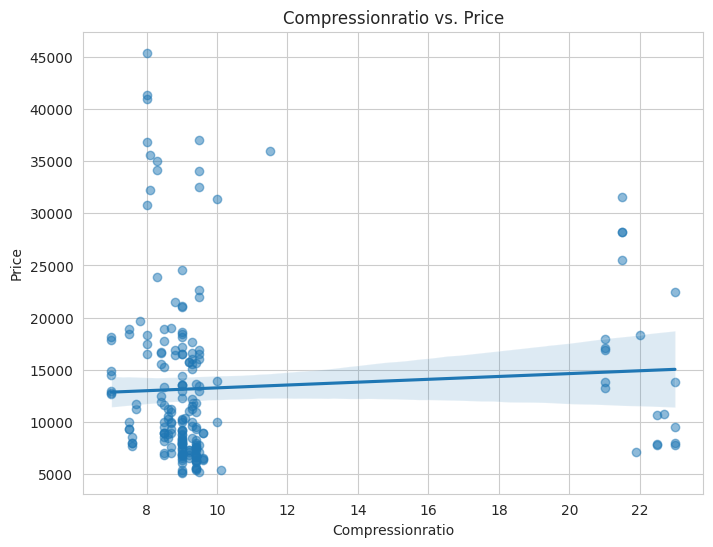

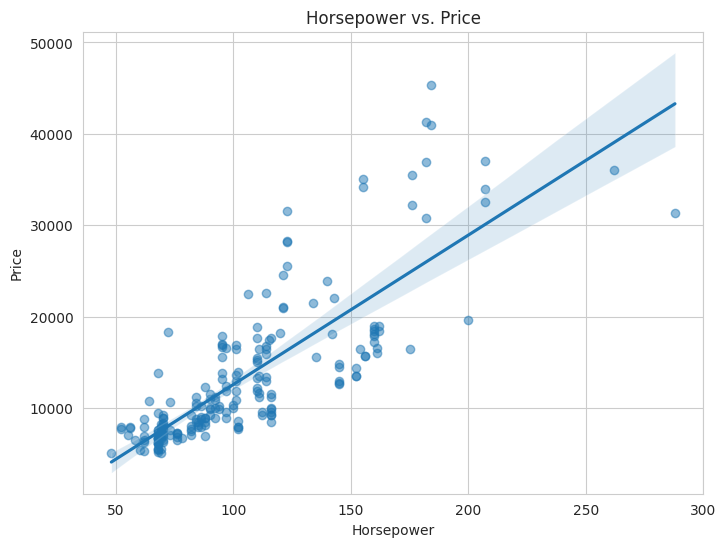

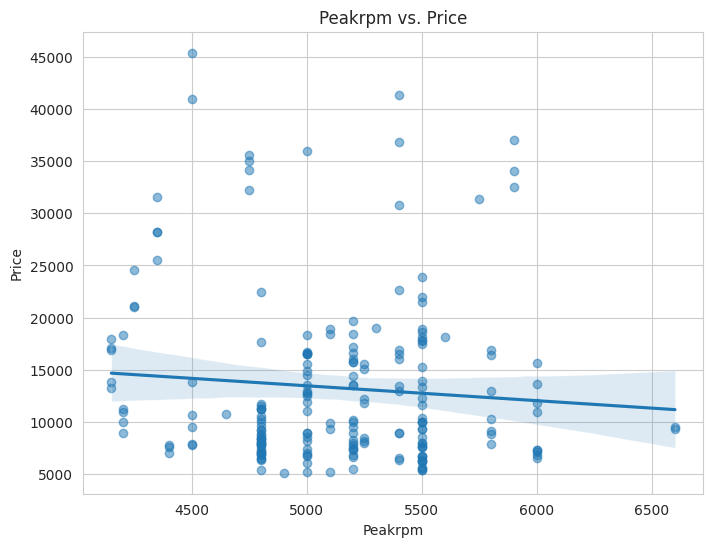

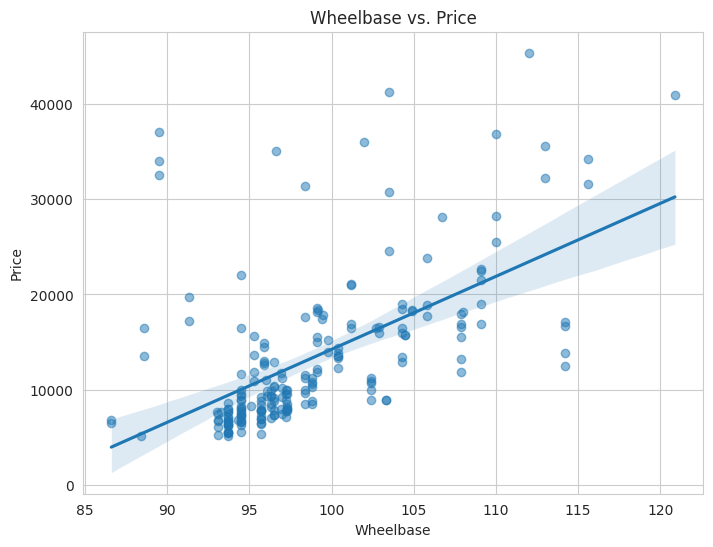

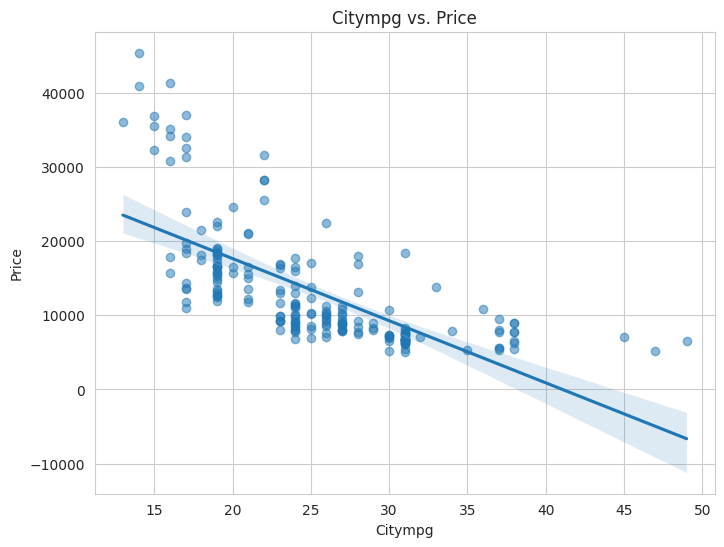

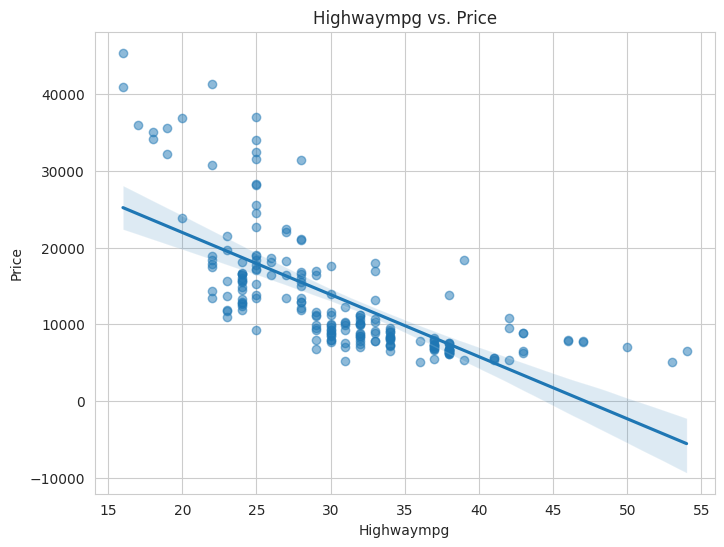

In [17]:
#simplify the process of plotting all the graphs by creating an array
variables = [
    'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'wheelbase', 'citympg', 'highwaympg'
]

for i, var in enumerate(variables, 1):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=var, y='price', data=cars_df, scatter_kws={'alpha':0.5})
    plt.title(f'{var.capitalize()} vs. Price')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    # Show plot
    plt.show()

In [ ]:
#Engine size, boreratio, horse power, and wheel base showed a strong positive relation with their price. Engine size had a relatively tight scatter which indicates even stringer correlation. Stroke, compression ratio, and peak RPM showed little to no correlation. City MPG shows a strong negative relationship. High way MPG also shows a strong negative correlation, but the result is skeptical due to the lack of the variety of data.

<ipython-input-18-1f66695d50ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cars_df.corr()


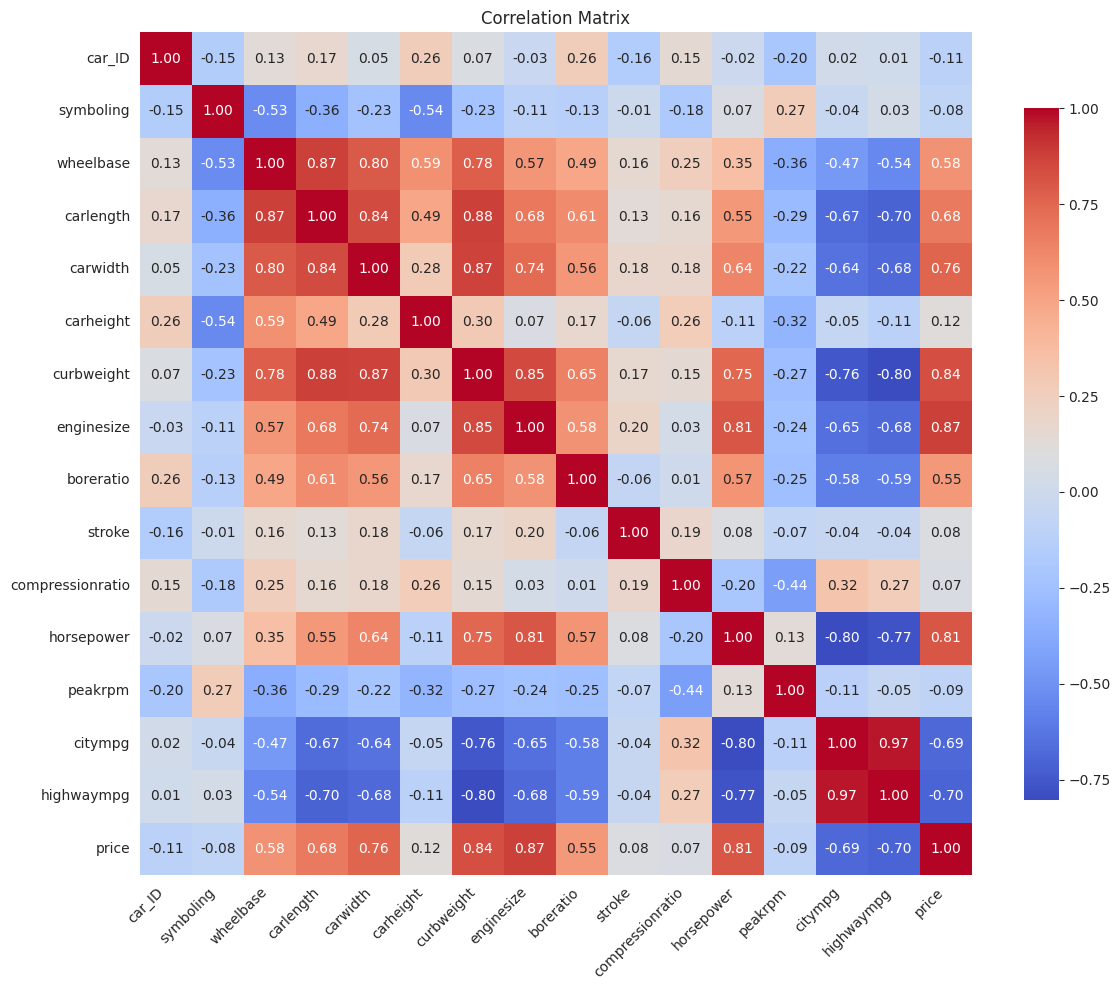

In [18]:
correlation = cars_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .82})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.tight_layout()

plt.show()

<ipython-input-19-da8274d2c750>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


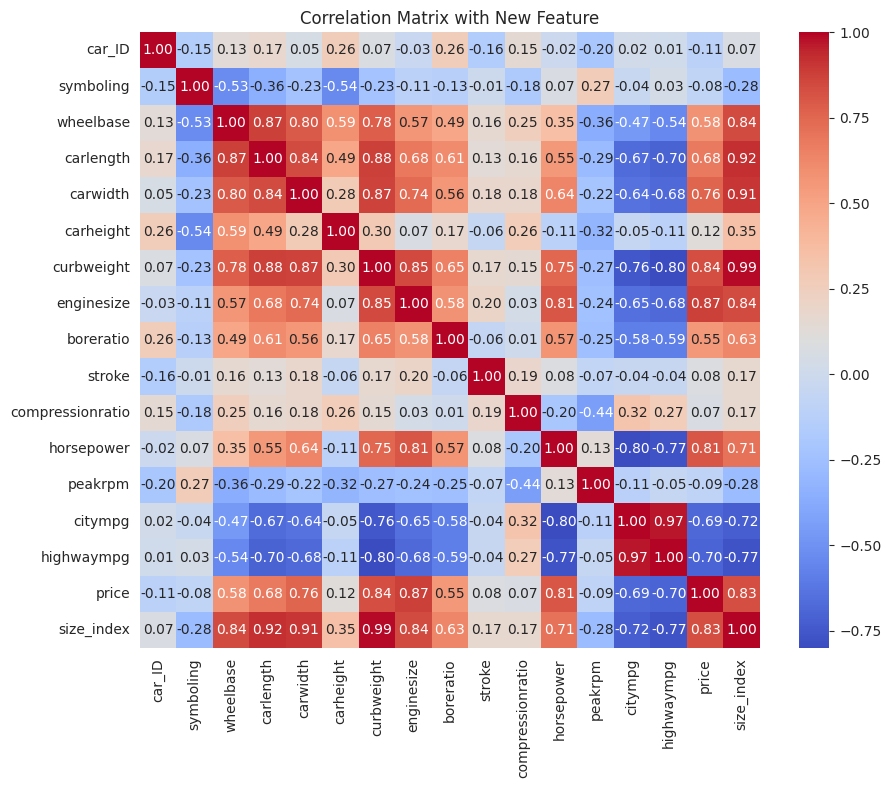

In [19]:
#From the provided correlation matrix, we can conclude that several features are strongly correlated with the price of the car. For example, enginesize, curbweight, horsepower, and carwidth show a strong positive correlation with price, indicating that as these features increase, the price of the car tends to increase as well.

#Regarding the combination of features, we could consider creating new composite features that may have a strong relationship with price. For instance, since carlength, carwidth, and curbweight are individually correlated with price, we might consider creating a feature that combines these dimensions into one, such as a "size index" or "volume" of the car, potentially by multiplying these three features.

#The new features
cars_df['size_index'] = cars_df['carlength'] * cars_df['carwidth'] * cars_df['curbweight']
new_corr_with_price = cars_df[['size_index', 'price']].corr().iloc[0,1]

plt.figure(figsize=(10, 8))
sns.heatmap(cars_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with New Feature')
plt.show()

In [22]:
# Create a new column 'fuel_economy' as the average of 'citympg' and 'highwaympg'
cars_df['fuel_economy'] = (cars_df['citympg'] + cars_df['highwaympg']) / 2
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,size_index,fuel_economy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,27569563.84,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,27569563.84,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,31655992.80,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,27321680.04,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,33114901.76,20.0


In [ ]:
#The list of variables that seem to be significant are:
#Engine Size: showed a strong positive correlation with price and a clear upward trend in the scatter plot. Larger engines typically indicate more power, which is a significant factor in the cost and pricing of a vehicle.
#Curb Weight: There was a substantial positive correlation between curb weight and price, suggesting that heavier cars, which often come with more features and larger engines, tend to be more expensive.
#Car Width: The width of a car is related to its size and possibly its stability and comfort, which might explain why it has a pronounced positive correlation with price.
#Horsepower: The scatter plot showed a strong and consistent upward trend between horsepower and price, indicating that more powerful cars are priced higher.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [50]:



X = pd.get_dummies(cars_df.drop(['price', 'CarName', 'car_company'], axis=1))
y = cars_df['price']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

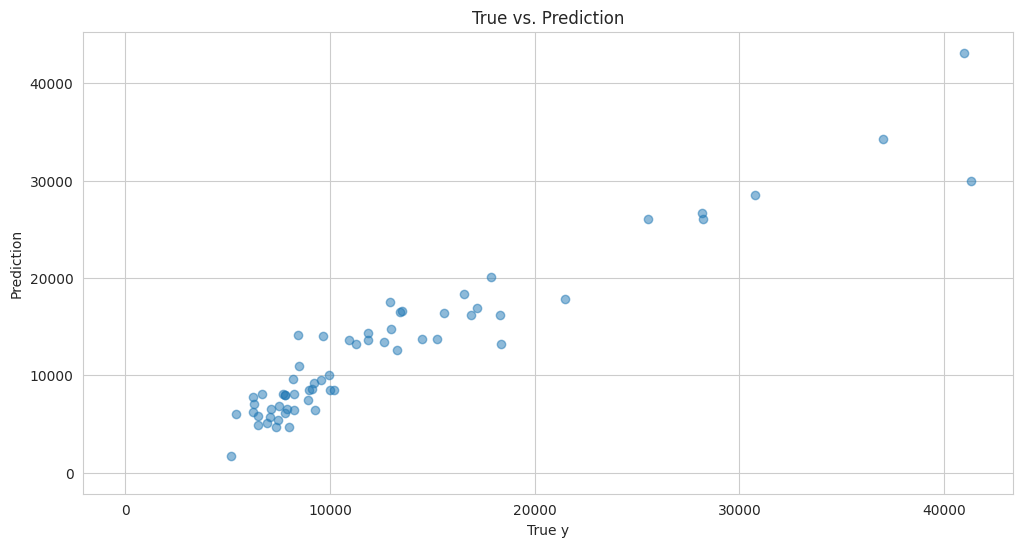

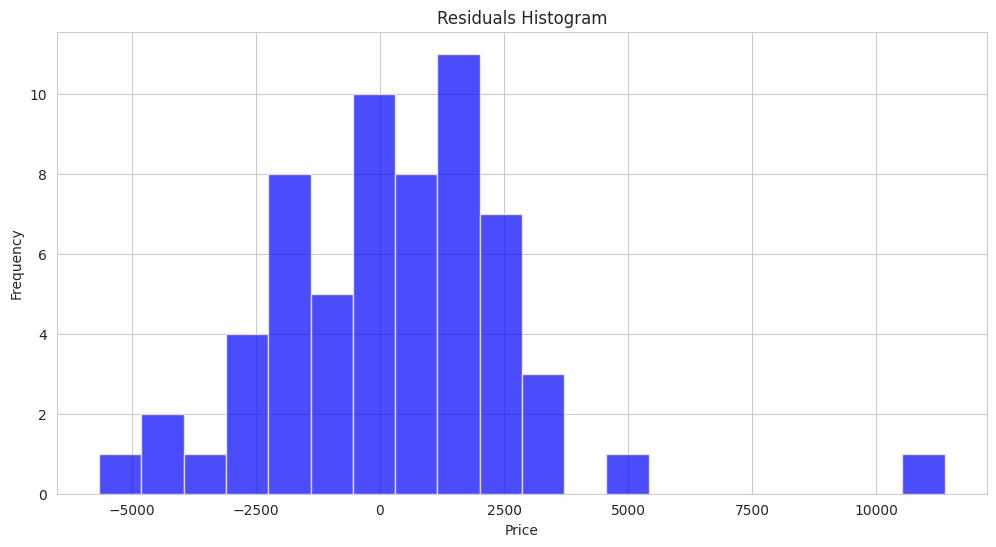

Manual R^2 Score : 0.9055316780259794


In [51]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions_scaled = model.predict(X_test)

# Scatter plot for true vs. prediction
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions_scaled, alpha=0.5)
plt.title('True vs. Prediction')
plt.xlabel('True y')
plt.ylabel('Prediction')
plt.plot([0, 1], [0, 1], 'k--')  # Plot a line y=x for reference
plt.show()

# Histogram of residuals
residuals = y_test - predictions_scaled
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.title('Residuals Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

residuals_scaled = y_test - predictions_scaled
ss_res_scaled = np.sum(residuals_scaled**2)
ss_tot_scaled = np.sum((y_test - np.mean(y_test))**2)
r2_manual_scaled = 1 - (ss_res_scaled / ss_tot_scaled)

print("Manual R^2 Score :", r2_manual_scaled)

In [37]:
coefficients_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])
coefficients_df = coefficients_df.sort_values(by='Coeff', ascending=False)

print(coefficients_df)

                            Coeff
doornumber_four      9.434873e+11
doornumber_two       9.434873e+11
enginelocation_rear  5.045106e+11
enginetype_dohcv     2.629324e+11
carbody_convertible  2.456420e+11
...                           ...
car_company_renault -4.009283e+11
CarName_audi 100 ls -4.622317e+11
aspiration_turbo    -6.080541e+11
aspiration_std      -6.080541e+11
cylindernumber_five -7.453535e+11

[224 rows x 1 columns]


In [ ]:
#Variables with larger absolute values of coefficients are typically considered more significant in predicting the price of a car because they indicate a stronger effect on the dependent variable. enginesize, curbweight, enginelocation_rear, carwidth, and peakrpm have larger coefficients, suggesting they are significant predictors of car price.
# An R^2 value, which was 0.9055316780259794, closer to 1 suggests that the model explains a large portion of the variance in the dependent variable